In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
import matplotlib
import mglearn
import os

from preamble import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from matplotlib.pyplot import rc
rc('font',family='New Gulim') #plot 한글폰트 적용

## 3.3 데이터 전처리와 스케일

### 3.3.1 여러가지 전처리 방법

- 스케일링 (Scaling):

    - 각 데이터 특성들에 대해 다음과 같은 선형 변환을 통해 전체 특성들의 통계적 분포(스케일)를 동일하게 맞추는 과정.
    - 각 특성(Column단위)들의 통계치를 이용한 변환 수행
    - 종류
        - StandardScaler
            - 각 특성의 평균을 0, 분산을 1로 변경
            - 각 특성의 최소값 및 최대값을 제한하지 않음
            - 단점: Outlier (이상치)에 영향을 많이 받음
            - $$ x_i–mean(x) \over stdev(x) $$
        - MinMaxScaler
       
            - 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경
            - 2차원 데이터인 경우 모든 데이터가 x축의 0과 1사이, y축의 0과 1사이 사각 영역에 위치하게 됨
            - $${ x_i – min(x)}\over {max(x)–min(x)}$$
            
        - RobustScaler

            - 중앙값(median, Q2(x))과 IQR(Inter-Quartile Range, Q3(x)–Q1(x))을 이용해서 척도를 표준화하는 방법
            - median 값이 0이 되도록 함
            - 전체 특성 값과 매우 동떨어진 특성 값에 영향을 받지 않음
            - $$ x_i–Q2(x) \over Q3(x)–Q1(x) $$
            
    - 참고

        - http://benalexkeen.com/feature-scaling-with-scikit-learn/
        - http://rfriend.tistory.com/269
        
        
- 정규화 (Nomalizer)

    - 각 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정
    - 즉, 2차원 데이터인 경우 지름이 1인 원에 데이터 포인트를 투영하고 3차원 데이터인 경우 지름이 1인 구에 데이터 포인트를 투영
    - 각 데이터(Row단위)들의 통계치를 이용한 변환 수행
    - 각 데이터가 서로 다른 비율로 스케일이 조정됨
    - 특성 벡터의 길이는 무관하고 __데이터의 방향(각도)만이 중요할때 많이 사용__
    - 종류
        - l1
        - l2 (기본)
        - max

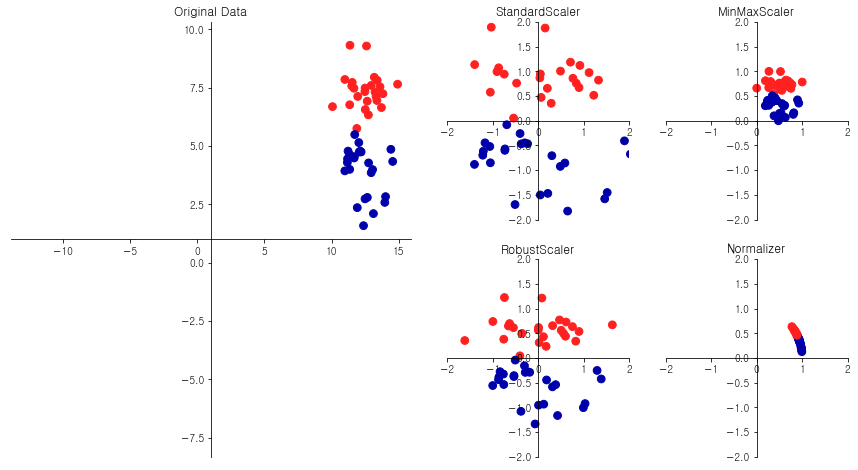

In [2]:
mglearn.plots.plot_scaling()

### 3.3.2 데이터 변환 적용하기

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)

(143, 30)
(143,)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

- 스케일링을 수행할 scaler에게 fit 함수를 호출함. 이때 훈련 데이터만 넘겨줌

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# transform data
X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))

# axis=0 --> 426개의 데이터들에 대해 동일한 Colume에 속한 각 특성값들에 대해 MinMaxScaling을 수행함
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0))) 
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
per-feature maximum before scaling:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- 테스트 데이터도 변환해줌
    - 테스트 데이터 변환시에 항상 훈련 데이터들의 통계치만을 사용
    - 즉, 테스트 데이터에 대해 다음과 같은 공식을 통하여 변환
    - $$  x_test_ ij  – x_train_min_j \over x_train_max_j – x_train_min_j  $$
위 식에서 i는 각 데이터 인덱스, j는 각 데이터들에 대한 특성 인덱스. 즉, min_j와 max_j는 동일한 j번째 특성들 전체에 대한 최소 및 최대값을 의미

In [7]:
# transform test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
per-feature maximum after scaling:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


### 3.3.3 훈련 데이터와 테스트 데이터의 스케일은 같은 방법으로 조정하기

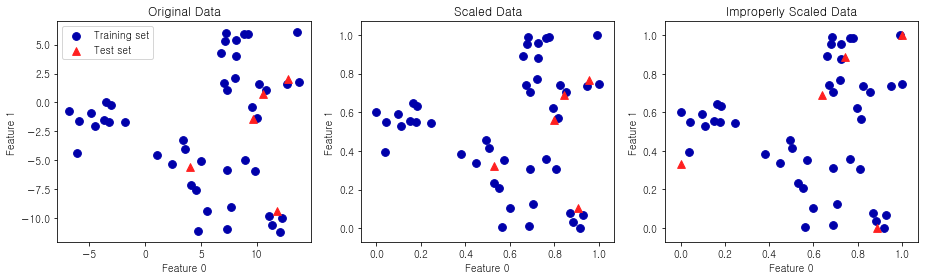

In [8]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

- 단축 메소드 사용
    - fit --> transform
    - fit_transform

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

### 3.3.4 지도 학습에서 데이터 전처리 효과

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


In [11]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [12]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
